In [1]:
"""
This pickles two matching datasets, first matching up the eventnumbers and then the jets, so that the data is in the same order.
"""

import uproot
import numpy as np

def pair_datasets(filename, compressedfilename):
    file = uproot.open(filename)

    #Compressed variables have a c in them somewhere
    filec = uproot.open(compressedfilename)

    feventNumber = file["CollectionTree/EventInfoAux.eventNumber"].array()
    fceventNumber = filec["CollectionTree/EventInfoAux.eventNumber"].array()

    fm = file["CollectionTree/AntiKt4EMTopoJetsAux.m"].array()
    fphi = file["CollectionTree/AntiKt4EMTopoJetsAux.phi"].array()
    feta = file["CollectionTree/AntiKt4EMTopoJetsAux.eta"].array()
    fpt = file["CollectionTree/AntiKt4EMTopoJetsAux.pt"].array()


    fcm = filec["CollectionTree/AntiKt4EMTopoJetsAux.m"].array()
    fcphi = filec["CollectionTree/AntiKt4EMTopoJetsAux.phi"].array()
    fceta = filec["CollectionTree/AntiKt4EMTopoJetsAux.eta"].array()
    fcpt = filec["CollectionTree/AntiKt4EMTopoJetsAux.pt"].array()

    print(fm[0])
    print(fphi[0])
    print(feta[0])
    print(fpt[0])
    
    fevents = [[feventNumber[i], fm[i], fphi[i], feta[i], fpt[i]] for i in range(0,len(feventNumber))]

    fcevents = [[fceventNumber[i], fcm[i], fcphi[i], fceta[i], fcpt[i]] for i in range(0,len(fceventNumber))]

    fevents.sort()
    fcevents.sort()

    if len(fevents) != len(fcevents):
        raise Exception("Number of events not matching")

    for i in range(0,len(fevents)):
        if fevents[i][0] != fcevents[i][0]:
            raise Exception("Events are not matching")

    #Match jets by deltaR < 0.05

    def proper_phi(phi):
        if phi < -np.pi:
            return phi+2*np.pi
        if phi > np.pi:
            return phi-2*np.pi
        return phi

    def deltaR(eta1, eta2, phi1, phi2):
        deta = eta1-eta2
        dphi = proper_phi(phi1-phi2)
        return np.sqrt(deta**2+dphi**2)

    #Iterate through every event and sort jets according to the uncompressed data

    compressed_events = []

    #Iterate through events
    for ei in range(0,len(fevents)):

        if ei % 1000 == 0:
            print(str(int(ei/len(fevents)*100)) + "%")

        cm = []
        cphi = []
        ceta = []
        cpt = []

        #Iterate through jets in uncompressed event
        for ji in range(0,len(fevents[ei][1])):
            for jci in range(0,len(fcevents[ei][1])):
                dR = deltaR(fevents[ei][3][ji], fcevents[ei][3][jci], fevents[ei][2][ji], fcevents[ei][2][jci])

                if dR < 0.05:
                    cm.append(fcevents[ei][1][jci])
                    cphi.append(fcevents[ei][2][jci])
                    ceta.append(fcevents[ei][3][jci])
                    cpt.append(fcevents[ei][4][jci])

                    #fcevents[ei][1] = np.delete(fcevents[ei][1],jci)
                    #fcevents[ei][2] = np.delete(fcevents[ei][2],jci)
                    #fcevents[ei][3] = np.delete(fcevents[ei][3],jci)
                    #fcevents[ei][4] = np.delete(fcevents[ei][4],jci)

        if len(fevents[ei][1]) == len(cm):	
            compressed_events.append([fevents[ei][0], cm, cphi, ceta, cpt])
        else:
            print("Jets not matched in event: " + str(fevents[ei][0]))
            
    return fevents, compressed_events

events, eventsc = pair_datasets("../../data/user.elmsheus.20339024.EXT1._000003.DAOD_PHYS.data.pool.root", "../../data/user.elmsheus.20338515.EXT1._000003.DAOD_PHYS.data.pool.root" )


[ 2.0919615e+04  2.3367516e+04  5.8009399e+03  7.2609873e+03
  5.6460752e+03  4.5637520e+03  5.6377856e+03  0.0000000e+00
  3.6297161e+03  5.4211318e+03  2.6348367e+03  3.4371787e+03
  4.3190845e+03  4.5525605e+03  4.2650225e+03  4.0006748e+03
  4.0108997e+03  0.0000000e+00  3.9073662e+03  3.6110381e+03
  3.0222659e+03  2.7063655e+03  3.0860740e+03  1.5625000e-02
 -1.1048543e-02  4.0124490e+03  2.7627454e+03  3.7568149e+03
  2.0591084e+03  1.5266379e+03  2.7975796e+03]
[ 2.4727128  -0.8729757   0.98777354  1.7244756  -2.5807614   0.5844973
  2.5233223   0.98675895 -0.72326547 -0.74574137  3.072432    2.187234
 -1.5771453   0.25901806 -1.3845842   1.0211321   2.0005302  -2.7862053
  2.8405206  -1.7626932  -0.03243314  1.4562871   0.7726901  -2.0334606
 -0.13543801 -1.8437551  -0.6457761  -2.3372142   2.8225253   2.4284086
 -2.9902968 ]
[-0.55231744 -1.5433034  -2.8653448  -0.82025725  4.0566583  -3.1621168
 -3.951666    3.9695506  -3.07553     0.33771786  3.3131092   3.1833103
 -0.75384

In [3]:
import pandas as pd

mcevents, mceventsc = pair_datasets("../../data/user.elmsheus.20339022.EXT1._000001.DAOD_PHYS.mc.pool.root", "../../data/user.elmsheus.20338512.EXT1._000001.DAOD_PHYS.mc.pool.root")

#Flatten lists
m = []
phi = []
eta = []
pt = []
for event in events:
    for k in range(0,len(event[1])):
        m.append(event[1][k])
        phi.append(event[2][k])
        eta.append(event[3][k])
        pt.append(event[4][k])
        
mc = []
phic = []
etac = []
ptc = []
for event in eventsc:
    for k in range(0,len(event[1])):
        mc.append(event[1][k])
        phic.append(event[2][k])
        etac.append(event[3][k])
        ptc.append(event[4][k])
        
#Create tensors
df_dict = {}
df_dict["m"] = m
df_dict["phi"] = phi
df_dict["eta"] = eta
df_dict["pt"] = pt

df = pd.DataFrame(data=df_dict)

print(df.head())

dfc_dict = {}
dfc_dict["m"] = mc
dfc_dict["phi"] = phic
dfc_dict["eta"] = etac
dfc_dict["pt"] = ptc

dfc = pd.DataFrame(data=dfc_dict)

print(dfc.head())

#Flatten lists
mmc = []
phimc = []
etamc = []
ptmc = []
for event in mcevents:
    for k in range(0,len(event[1])):
        mmc.append(event[1][k])
        phimc.append(event[2][k])
        etamc.append(event[3][k])
        ptmc.append(event[4][k])
        
mcmc = []
phicmc = []
etacmc = []
ptcmc = []
for event in mceventsc:
    for k in range(0,len(event[1])):
        mcmc.append(event[1][k])
        phicmc.append(event[2][k])
        etacmc.append(event[3][k])
        ptcmc.append(event[4][k])
        
#Create tensors
dfmc_dict = {}
dfmc_dict["m"] = mmc
dfmc_dict["phi"] = phimc
dfmc_dict["eta"] = etamc
dfmc_dict["pt"] = ptmc

dfmc = pd.DataFrame(data=dfmc_dict)

print(dfmc.head())

dfcmc_dict = {}
dfcmc_dict["m"] = mcmc
dfcmc_dict["phi"] = phicmc
dfcmc_dict["eta"] = etacmc
dfcmc_dict["pt"] = ptcmc

dfcmc = pd.DataFrame(data=dfcmc_dict)

print(dfcmc.head())

[ 1.6614633e+04  1.7454613e+04  1.4895077e+04  3.9112412e+03
  6.1327612e+03  5.6954561e+03  4.1458403e+03  2.4993506e+03
  4.1256978e+03  4.6188350e+03  3.6719392e+03  3.5008440e+03
  3.2062336e+03  3.7774551e+03 -1.9531250e-03]
[-0.44923964  3.0019777   2.509578   -1.7167867   1.9280443  -2.9645102
 -0.63860893 -0.8232872  -1.5472498   1.7537953  -2.603745   -0.00549562
 -2.3141277  -2.4979866   0.14608406]
[ 1.8384849   0.01140231 -0.84381425 -2.7461402  -1.2980796  -1.271379
 -2.2354922   0.1563031  -3.1955166   1.7043937   1.1747011   2.2474334
 -0.6666551   0.58536345 -2.9910886 ]
[131921.98   98908.36   85059.72   33814.91   26161.025  22545.824
  22000.344  21950.81   21144.102  20267.87   18519.238  16702.271
  16607.28   16267.788  16023.828]
0%
2%
4%
6%
8%
10%
12%
14%
16%
18%
20%
22%
24%
26%
28%
30%
32%
34%
36%
38%
40%
42%
44%
46%
48%
50%
52%
54%
56%
57%
60%
62%
64%
66%
68%
70%
72%
74%
76%
78%
80%
82%
84%
86%
88%
90%
92%
94%
96%
98%
              m       phi       eta       

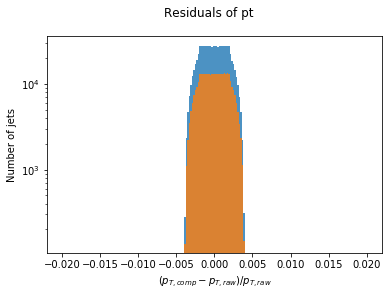

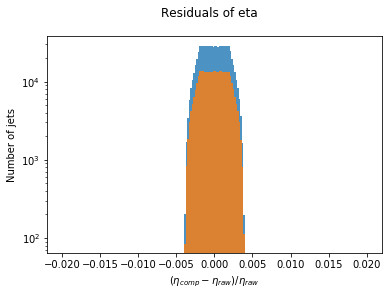

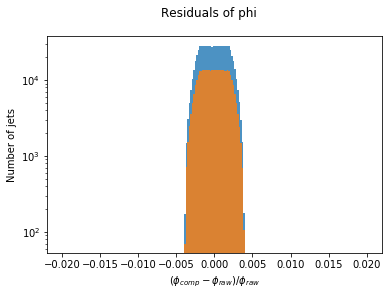

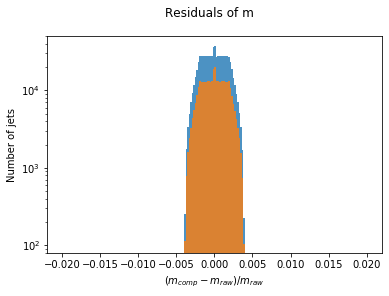

In [7]:
import sys
BIN = '../../'
sys.path.append(BIN)
import utils
import matplotlib.pyplot as plt
from scipy import stats
import my_matplotlib_style as ms

plt.close('all')
unit_list = ['[GeV]', '[rad]', '[rad]', '[GeV]']
variable_list = [r'$m$', r'$p_T$', r'$\phi$', r'$\eta$']
line_style = ['--', '-']
colors = ['orange', 'c']
markers = ['*', 's']
alph = 0.8
n_bins = 200

residual_strings = [r'$(p_{T,comp} - p_{T,raw}) / p_{T,raw}$',
                        r'$(\eta_{comp} - \eta_{raw}) / \eta_{raw}$',
                        r'$(\phi_{comp} - \phi_{raw}) / \phi_{raw}$',
                        r'$(m_{comp} - m_{raw}) / m_{raw}$']


residuals = (dfc - df) / df
residualsmc = (dfcmc - dfmc) / dfmc

branches = ["pt","eta","phi","m"]

range = (-.02, .02)
#range=None
for kk in np.arange(4):
    plt.figure()
    n_hist_pred, bin_edges, _ = plt.hist(
        residualsmc[branches[kk]], label='Residuals MC', linestyle=line_style[0], alpha=alph, bins=n_bins, range=range)
    plt.suptitle('Residuals of %s' % branches[kk])
    n_hist_pred, bin_edges, _ = plt.hist(
        residuals[branches[kk]], label='Residuals', linestyle=line_style[0], alpha=alph, bins=n_bins, range=range)
    plt.xlabel(residual_strings[kk])  # (train.columns[kk], train.columns[kk], train.columns[kk]))
    plt.ylabel('Number of jets')
    plt.yscale("log")
    #ms.sciy()
    #plt.yscale('log')
    std = np.std(residuals[branches[kk]])
    std_err = utils.std_error(residuals[branches[kk]])
    mean = np.nanmean(residuals[branches[kk]])
    sem = stats.sem(residuals[branches[kk]], nan_policy='omit')
    ax = plt.gca()
    #plt.text(.75, .8, 'Mean = %f$\pm$%f\n$\sigma$ = %f$\pm$%f' % (mean, sem, std, std_err), bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 10},
    #         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=18)
    fig_name = 'trainforever_residual_%s' % branches[kk]
    #plt.savefig(curr_save_folder + fig_name)

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=41)
trainmc, testmc = train_test_split(dfmc, test_size=0.2, random_state=41)

processed_folder ="../../processed_data/"

train_filename = "floatcompression_4D_train_raw.pkl"
test_filename = "floatcompression_4D_test_raw.pkl"

train_mc_filename = "floatcompression_4D_train_mc_raw.pkl"
test_mc_filename = "floatcompression_4D_test_mc_raw.pkl"

compressed_filename = "floatcompression_4D_compressed.pkl"
compressed_mc_filename = "floatcompression_4D_mc_compressed.pkl"

# Save train and test sets
print('Saving ' + processed_folder + train_filename)
train.to_pickle(processed_folder + train_filename)
print("Saving " + processed_folder + test_filename)
test.to_pickle(processed_folder + test_filename)

print('Saving ' + processed_folder + train_mc_filename)
trainmc.to_pickle(processed_folder + train_mc_filename)
print("Saving " + processed_folder + test_mc_filename)
testmc.to_pickle(processed_folder + test_mc_filename)

#Save compressed sets
print('Saving ' + processed_folder + compressed_filename)
dfc.to_pickle(processed_folder+compressed_filename)
print('Saving ' + processed_folder + compressed_mc_filename)
dfcmc.to_pickle(processed_folder+compressed_mc_filename)

Saving ../../processed_data/floatcompression_4D_train_raw.pkl
Saving ../../processed_data/floatcompression_4D_test_raw.pkl
Saving ../../processed_data/floatcompression_4D_train_mc_raw.pkl
Saving ../../processed_data/floatcompression_4D_test_mc_raw.pkl
Saving ../../processed_data/floatcompression_4D_compressed.pkl
Saving ../../processed_data/floatcompression_4D_mc_compressed.pkl
